In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load



In [2]:
# Load the CSV file
df = pd.read_csv('oil_spill.csv')

# View the first few rows of the dataset
print(df.head())

   f_1    f_2      f_3     f_4  f_5       f_6    f_7   f_8      f_9  f_10  \
0    1   2558  1506.09  456.63   90   6395000  40.88  7.89  29780.0  0.19   
1    2  22325    79.11  841.03  180  55812500  51.11  1.21  61900.0  0.02   
2    3    115  1449.85  608.43   88    287500  40.42  7.34   3340.0  0.18   
3    4   1201  1562.53  295.65   66   3002500  42.40  7.97  18030.0  0.19   
4    5    312   950.27  440.86   37    780000  41.43  7.03   3350.0  0.17   

   ...     f_41      f_42     f_43     f_44   f_45  f_46      f_47   f_48  \
0  ...  2850.00   1000.00   763.16   135.46   3.73     0  33243.19  65.74   
1  ...  5750.00  11500.00  9593.48  1648.80   0.60     0  51572.04  65.73   
2  ...  1400.00    250.00   150.00    45.13   9.33     1  31692.84  65.81   
3  ...  6041.52    761.58   453.21   144.97  13.33     1  37696.21  65.67   
4  ...  1320.04    710.63   512.54   109.16   2.58     0  29038.17  65.66   

   f_49  target  
0  7.95       1  
1  6.26       0  
2  7.84       1  
3 

In [3]:
# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [8]:
# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 96.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       182
           1       0.50      0.33      0.40         6

    accuracy                           0.97       188
   macro avg       0.74      0.66      0.69       188
weighted avg       0.96      0.97      0.96       188



In [9]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are any missing values, we can fill them (or drop, depending on the situation)
# Assuming we fill missing values with the median of the respective column
df.fillna(df.median(), inplace=True)

Missing values in each column:
 f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64


In [10]:
# 2. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Drop duplicate rows if any
df = df.drop_duplicates()


Number of duplicate rows: 0


In [11]:
summary_stats = df.describe()
print("\nSummary statistics:\n", summary_stats)


Summary statistics:
               f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12.718404    3.588878    8167.427625    0.090316  ...   
min 

In [12]:
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

In [13]:
# Initialize a StandardScaler to normalize the features
scaler = StandardScaler()

# Fit and transform the feature set
X_scaled = scaler.fit_transform(X)

In [14]:
# Convert the scaled data back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Train-Test Split (optional)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


In [15]:
# Print the cleaned and preprocessed data (first 5 rows)
print("\nCleaned and Preprocessed Data (first 5 rows):")
print(X_scaled_df.head())

# The data is now cleaned and preprocessed, ready for modeling.


Cleaned and Preprocessed Data (first 5 rows):
        f_1        f_2       f_3       f_4       f_5        f_6       f_7  \
0 -1.240922   1.152390  1.346434 -0.793007  0.129657   1.469091 -0.185871   
1 -1.225524  11.389546 -1.033273 -0.057342  2.114766  14.374844  0.618905   
2 -1.210126  -0.112818  1.252645 -0.502492  0.085544  -0.125929 -0.222058   
3 -1.194727   0.449611  1.440556 -1.101091 -0.399705   0.583114 -0.066295   
4 -1.179329  -0.010794  0.419520 -0.823188 -1.039352   0.002691 -0.142604   

        f_8       f_9      f_10  ...      f_40      f_41       f_42  \
0 -0.345107  3.165389 -0.343460  ...  0.611105  1.913877   0.800597   
1 -2.207407  7.100184 -2.226754  ...  0.611105  4.810555  15.485710   
2 -0.498440 -0.073589 -0.454242  ...  0.611105  0.465538  -0.248340   
3 -0.322804  1.725979 -0.343460  ...  0.611105  5.101741   0.467147   
4 -0.584864 -0.072364 -0.565024  ...  0.611105  0.385669   0.395889   

        f_43       f_44      f_45      f_46      f_47      f_48

In [16]:
# Q2. 1. Handling Missing Values (Null values)
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64


In [17]:
# Impute missing values with median for numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')

df[numerical_features] = imputer.fit_transform(df[numerical_features])


In [18]:
# 2. One-Hot Encoding for Categorical Variables (if applicable)
# First, we check if there are any categorical features
categorical_features = df.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    print("\nCategorical features detected:", categorical_features) 

In [19]:
# 3. Feature Scaling
# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

In [20]:
# 5. Final Dataset after Preprocessing
print("\nPreprocessed Data (first 5 rows):")
print(X_scaled_df.head())


Preprocessed Data (first 5 rows):
        f_1        f_2       f_3       f_4       f_5        f_6       f_7  \
0 -1.240922   1.152390  1.346434 -0.793007  0.129657   1.469091 -0.185871   
1 -1.225524  11.389546 -1.033273 -0.057342  2.114766  14.374844  0.618905   
2 -1.210126  -0.112818  1.252645 -0.502492  0.085544  -0.125929 -0.222058   
3 -1.194727   0.449611  1.440556 -1.101091 -0.399705   0.583114 -0.066295   
4 -1.179329  -0.010794  0.419520 -0.823188 -1.039352   0.002691 -0.142604   

        f_8       f_9      f_10  ...      f_40      f_41       f_42  \
0 -0.345107  3.165389 -0.343460  ...  0.611105  1.913877   0.800597   
1 -2.207407  7.100184 -2.226754  ...  0.611105  4.810555  15.485710   
2 -0.498440 -0.073589 -0.454242  ...  0.611105  0.465538  -0.248340   
3 -0.322804  1.725979 -0.343460  ...  0.611105  5.101741   0.467147   
4 -0.584864 -0.072364 -0.565024  ...  0.611105  0.385669   0.395889   

        f_43       f_44      f_45      f_46      f_47      f_48      f_49  

In [21]:
#Q3. 1. Class Distribution (to check for class imbalance)
class_distribution = df['target'].value_counts(normalize=True)
print("\nClass Distribution (Spill vs Non-Spill):")
print(class_distribution)



Class Distribution (Spill vs Non-Spill):
target
0.0    0.956243
1.0    0.043757
Name: proportion, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\105300536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel', edgecolor='black')


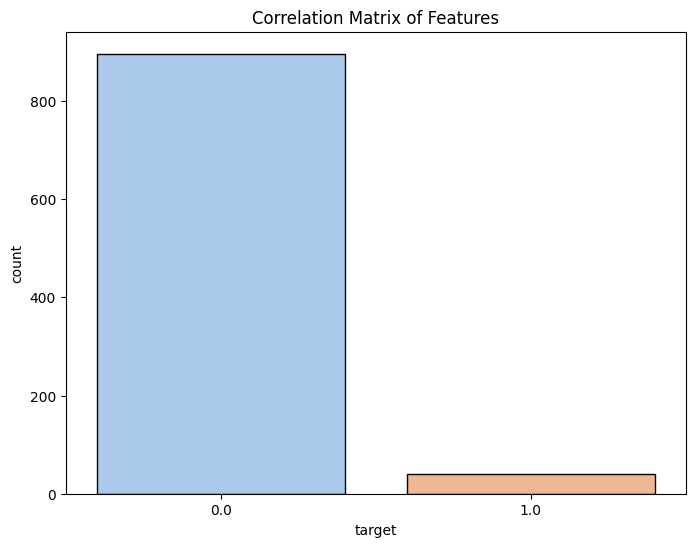

In [22]:
# Plot class distribution with a customized design
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='pastel', edgecolor='black')
plt.title('Correlation Matrix of Features')
plt.show()

In [23]:
# 2. Summary Statistics of the Features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12.718404    3.588878    8167.427625    0.090316  ...   
min  

In [24]:
# 3. Correlation Matrix (to check feature correlations with target)
correlation_matrix = df.corr()


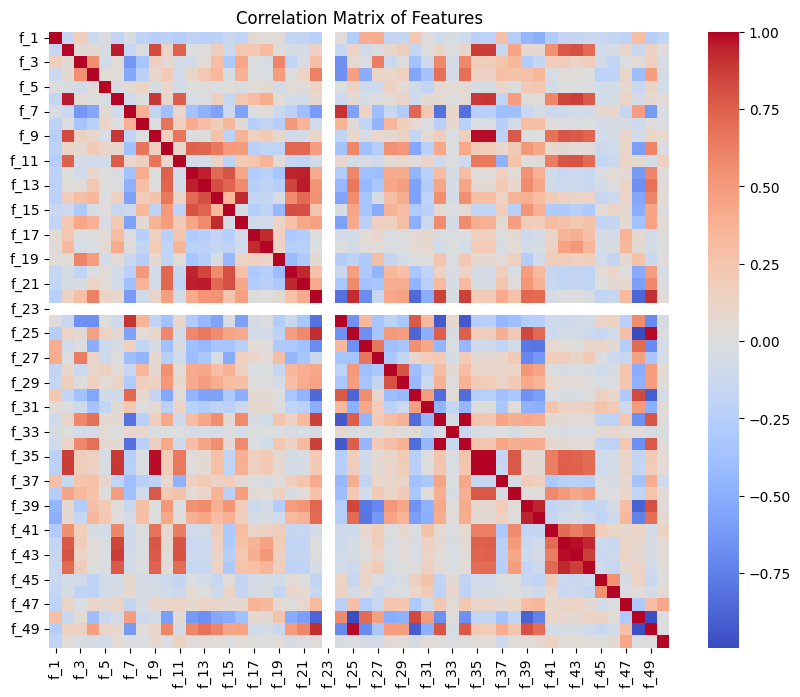

In [25]:
# Display correlation heatmap for insights
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [26]:
# 4. Correlation of Features with Target
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelation of Features with Target (Top 10):")
print(correlation_with_target.head(10))


Correlation of Features with Target (Top 10):
target    1.000000
f_47      0.436890
f_11      0.157588
f_41      0.148987
f_9       0.076679
f_40      0.066220
f_28      0.061178
f_46      0.058537
f_42      0.050657
f_16      0.050515
Name: target, dtype: float64


In [27]:
# 5. Feature Importance using Random Forest
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']


In [28]:
# Train a RandomForest to extract feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance and sort
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)



Top 10 Important Features Based on Random Forest:
f_47    0.122947
f_1     0.064949
f_25    0.053348
f_17    0.033174
f_24    0.030025
f_8     0.029820
f_7     0.029042
f_41    0.028235
f_10    0.025778
f_11    0.024566
dtype: float64


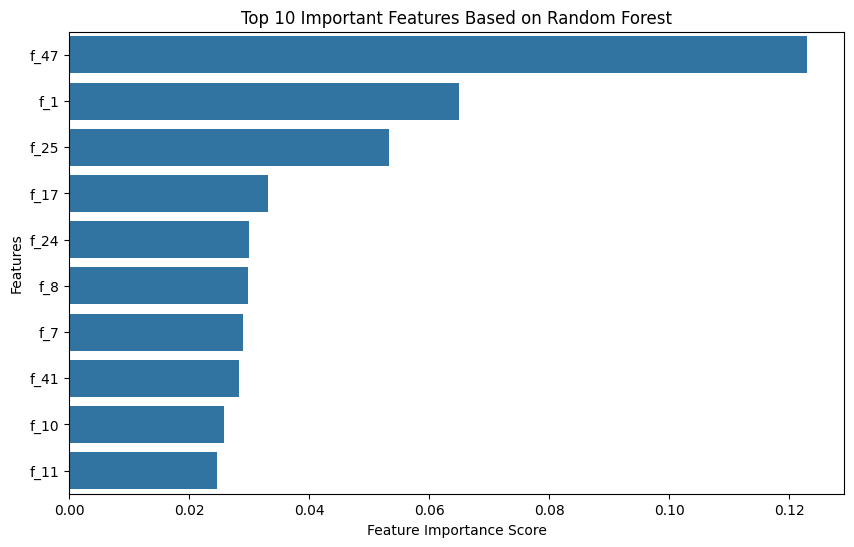

In [29]:
# Display top 10 important features
print("\nTop 10 Important Features Based on Random Forest:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Important Features Based on Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [30]:
# Q4. Preprocessing: Assuming df is already preprocessed as per previous steps
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

In [31]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}


In [34]:
# Initialize results dictionary
results = {}


In [35]:
# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)  # Use scaled data for fitting
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)  # Use scaled data for predictions
    

In [36]:
# Display detailed classification reports for each model
for model_name, metrics in results.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(metrics['Classification Report'])

In [37]:
#Q5. Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [38]:

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc =(y_test,(X_test_scaled)[:, 0])
    results[model_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Model': model
    }

In [39]:
# Identify the best model
#best_model_name = max(results, key=lambda x: results[x]['ROC AUC'])
#best_model = results[best_model_name]['Model']

In [40]:
# Q6. Load the saved model
model_filename = 'best_model.joblib'
#loaded_model = load(model.joblib)

# Randomly sample 20 data points from the original dataset
sampled_data = df.sample(n=20, random_state=42)  # Set random_state for reproducibility


In [41]:
# Prepare features for prediction (excluding the target column)
X_sample = sampled_data.drop(columns=['target'])

# Scale the features using the same scaler used for training
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

In [42]:
# Optionally, save the new dataset to a CSV file
sampled_data.to_csv('sampled_oil_spill_predictions.csv', index=False)
print("\nNew dataset with predictions saved to 'sampled_oil_spill_predictions.csv'.")


New dataset with predictions saved to 'sampled_oil_spill_predictions.csv'.
